In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



def load_data(file_name, col_name, log_path = '../output/output.txt'):
    """
    Read in input file and load data

    root_dir: a path for data directory
    datafile: a text file for saving output

    return: X and y dataframe
    """
    output_file = open(log_path, 'a')

    df = pd.read_csv(file_name)
    print("\n********** Data Summary **********\n")
    print(df.shape, "\n")
    print(df.head(3), "\n")
    print(df.info(), "\n")

    print("\n********** Data Summary **********\n", file=output_file)
    print(df.shape, "\n", file=output_file)
    print(df.head(3), "\n", file=output_file)
    print(df.info(), "\n", file=output_file)
    ## Remove duplicates if any and keep first occurrence
    # df.drop_duplicates(subset=['pmid'], keep='first', inplace=True)

    print("\n********** Data Shape after Removing Duplicates **********\n")
    print(df.shape, "\n")

    print("\n********** Data Shape after Removing Duplicates **********\n", file=output_file)
    print(df.shape, "\n", file=output_file)

    # if col_name == 'mix':
    #     df['mix'] = df['title'] + df['abstract']
    ## clean the sign column
    df['sign'] = df['sign'].apply(lambda x: str(x).split(' ')[0])
    df = df[df['sign'] != 'nan']

    df = df[['sign', col_name]]
    ## Check if any columns contain null values
    print("\n********** Count of Null Values for Each Column **********\n")
    print(df.isnull().sum(), "\n")

    print("\n********** Count of Null Values for Each Column **********\n", file=output_file)
    print(df.isnull().sum(), "\n", file=output_file)

    ## Drop instances including null values
    df = df.dropna()

    print("\n********** Data Shape after Removing Null Values **********\n")
    print(df.shape, "\n")

    print("\n********** Data Shape after Removing Null Values **********\n", file=output_file)
    print(df.shape, "\n", file=output_file)

    print("\n********** Class Label Distribution **********\n")
    print(df["sign"].value_counts())

    print("\n********** Class Label Distribution **********\n", file=output_file)
    print(df["sign"].value_counts(), file=output_file)
    ## Trim unnecessary spaces for strings
    df[col_name] = df[col_name].apply(lambda x: str(x).strip())

    ## Split into X and y (target)
    X, y = df.loc[:, col_name], df.loc[:, 'sign']
    output_file.close()
    return X, y


# Insert your code here

def preprocess_data(data,log_path = '../output/output.txt'):
    """
       Preprocess data with lowercase conversion, punctuation removal, tokenization, stemming

       X_data: X data in dataframe
       return: transformed dataframe

    """
    output_file = open(log_path, 'a')

    print("\n\n********** Pre-processing Data **********\n")
    print("\n\n********** Pre-processing Data **********\n", file=output_file)

    ## Make sure that data type is string
    X_data = data.astype(str)

    ## 1. convert all characters to lowercase
    X_data = X_data.map(lambda x: x.lower())

    ## 2. remove punctuation
    X_data = X_data.str.replace('[^\w\s]', '')

    ## 3. tokenize sentence
    X_data = X_data.apply(nltk.word_tokenize)

    ## 4. remove stopwords
    stopword_list = stopwords.words("english")
    X_data = X_data.apply(lambda x: [word for word in x if word not in stopword_list])

    ## 5. stemming
    stemmer = PorterStemmer()
    X_data = X_data.apply(lambda x: [stemmer.stem(y) for y in x])

    ## 6. removing unnecessary space
    X_data = X_data.apply(lambda x: " ".join(x))
    output_file.close()

    return X_data

<>:110: SyntaxWarning: invalid escape sequence '\w'
<>:110: SyntaxWarning: invalid escape sequence '\w'
/var/folders/ht/b8yjqyzj437bhml46pc2sxzm0000gn/T/ipykernel_49269/3182552509.py:110: SyntaxWarning: invalid escape sequence '\w'
  X_data = X_data.str.replace('[^\w\s]', '')
[nltk_data] Downloading package punkt to /Users/jimmy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/jimmy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/jimmy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/jimmy/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
data_path = '../data/okcupid_profiles.csv'
col_name = 'essay0'
model_name = 'Logistic'

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

X, y = load_data(data_path, col_name)

Xp = preprocess_data(X)
X_train, X_test, y_train, y_test = train_test_split(Xp, y, test_size=0.2, random_state=5, stratify=y)

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


model = LogisticRegression(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# os.rename('../output/output.txt', f'../output/baseline_{col_name}_{model_name}.txt')


********** Data Summary **********

(59946, 31) 

   age     status sex orientation       body_type               diet  \
0   22     single   m    straight  a little extra  strictly anything   
1   35     single   m    straight         average       mostly other   
2   38  available   m    straight            thin           anything   

     drinks      drugs                       education     ethnicity  ...  \
0  socially      never   working on college/university  asian, white  ...   
1     often  sometimes           working on space camp         white  ...   
2  socially        NaN  graduated from masters program           NaN  ...   

                                              essay0  \
0  about me:  i would love to think that i was so...   
1  i am a chef: this is what that means. 1. i am ...   
2  i'm not ashamed of much, but writing public te...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating 

In [4]:
X_test.shape

(8960, 41755)

              precision    recall  f1-score   support

    aquarius       0.08      0.08      0.08       715
       aries       0.09      0.08      0.08       735
      cancer       0.07      0.08      0.07       766
   capricorn       0.09      0.05      0.06       651
      gemini       0.09      0.12      0.10       794
         leo       0.10      0.13      0.11       802
       libra       0.09      0.10      0.10       774
      pisces       0.09      0.07      0.08       723
 sagittarius       0.07      0.06      0.07       726
     scorpio       0.11      0.11      0.11       756
      taurus       0.10      0.10      0.10       757
       virgo       0.09      0.10      0.10       761

    accuracy                           0.09      8960
   macro avg       0.09      0.09      0.09      8960
weighted avg       0.09      0.09      0.09      8960


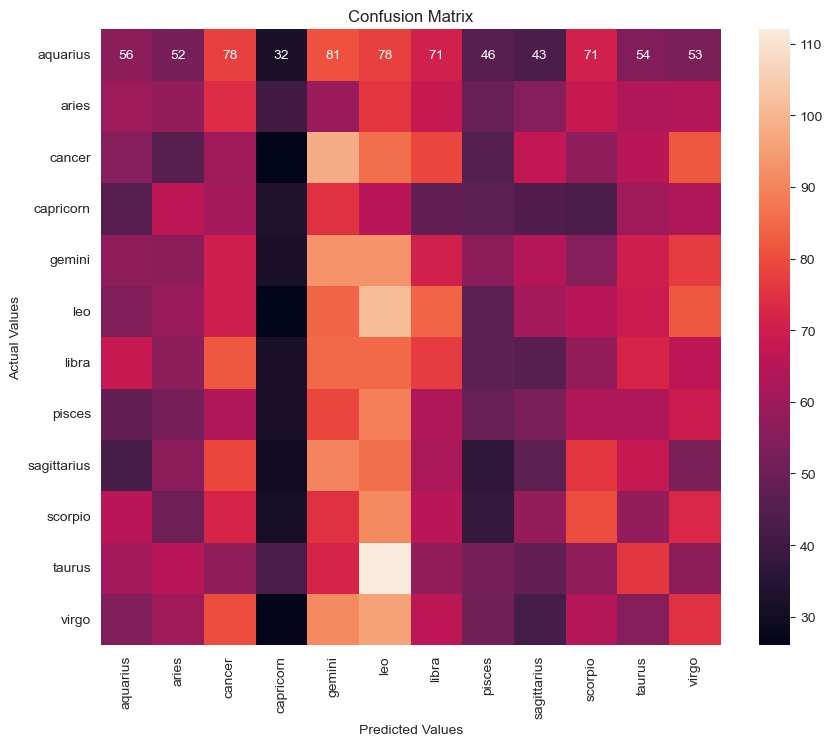

In [15]:
print(classification_report(y_test, y_pred))

#Plotting the confusion matrix
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm = confusion_matrix(y_test, y_pred, labels=sorted(list(set(y))))
import matplotlib.pyplot as plt
import seaborn as sns

cm_df = pd.DataFrame(cm,
                     index =sorted(list(set(y))),
                     columns = sorted(list(set(y))))
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## Transformer Embedding

In [6]:
import _pickle as cPickle
with open(rf"../embeddings/transformer/transformer_essay{0}.pickle", "rb") as input_file:
    X2 = cPickle.load(input_file)
with open(f"../embeddings/transformer/y.pickle", "rb") as input_file:
    y2 = cPickle.load(input_file)



# X, y = load_data(data_path, col_name)

# Xp = preprocess_data(X)
# X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=5, stratify=y2)
# vectorizer = TfidfVectorizer()
# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.transform(X_test)

model2 = LogisticRegression(random_state=0,max_iter=1000)
model2.fit(X_train2, y_train2)
y_pred2 = model2.predict(X_test2)
# os.rename('../output/output.txt', f'../output/baseline_transformer_{col_name}_{model_name}.txt')

In [7]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

    aquarius       0.09      0.07      0.08       786
       aries       0.08      0.07      0.07       798
      cancer       0.09      0.10      0.09       841
   capricorn       0.07      0.04      0.05       715
      gemini       0.10      0.11      0.10       862
         leo       0.07      0.09      0.08       875
       libra       0.08      0.09      0.08       841
      pisces       0.07      0.05      0.06       789
 sagittarius       0.09      0.07      0.08       788
     scorpio       0.08      0.07      0.07       827
      taurus       0.08      0.14      0.10       828
       virgo       0.09      0.09      0.09       828

    accuracy                           0.08      9778
   macro avg       0.08      0.08      0.08      9778
weighted avg       0.08      0.08      0.08      9778


In [12]:
sorted(list(set(y)))

['aquarius',
 'aries',
 'cancer',
 'capricorn',
 'gemini',
 'leo',
 'libra',
 'pisces',
 'sagittarius',
 'scorpio',
 'taurus',
 'virgo']

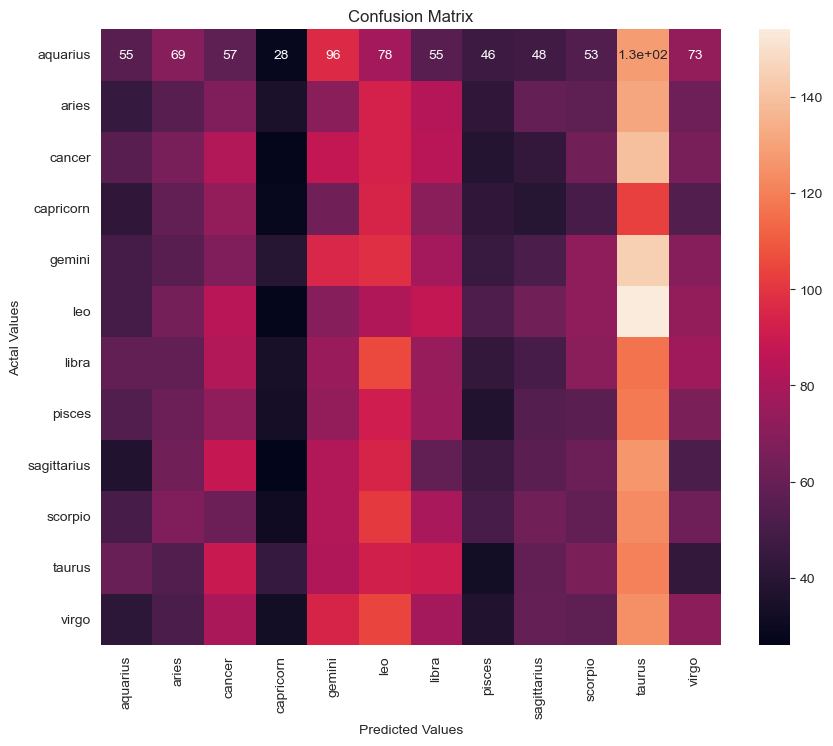

In [16]:

#Plotting the confusion matrix
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm2 = confusion_matrix(y_test2, y_pred2, labels=sorted(list(set(y))))
import matplotlib.pyplot as plt
import seaborn as sns

cm_df2 = pd.DataFrame(cm2,
                     index =sorted(list(set(y))),
                     columns = sorted(list(set(y))))
plt.figure(figsize=(10,8))
sns.heatmap(cm_df2, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

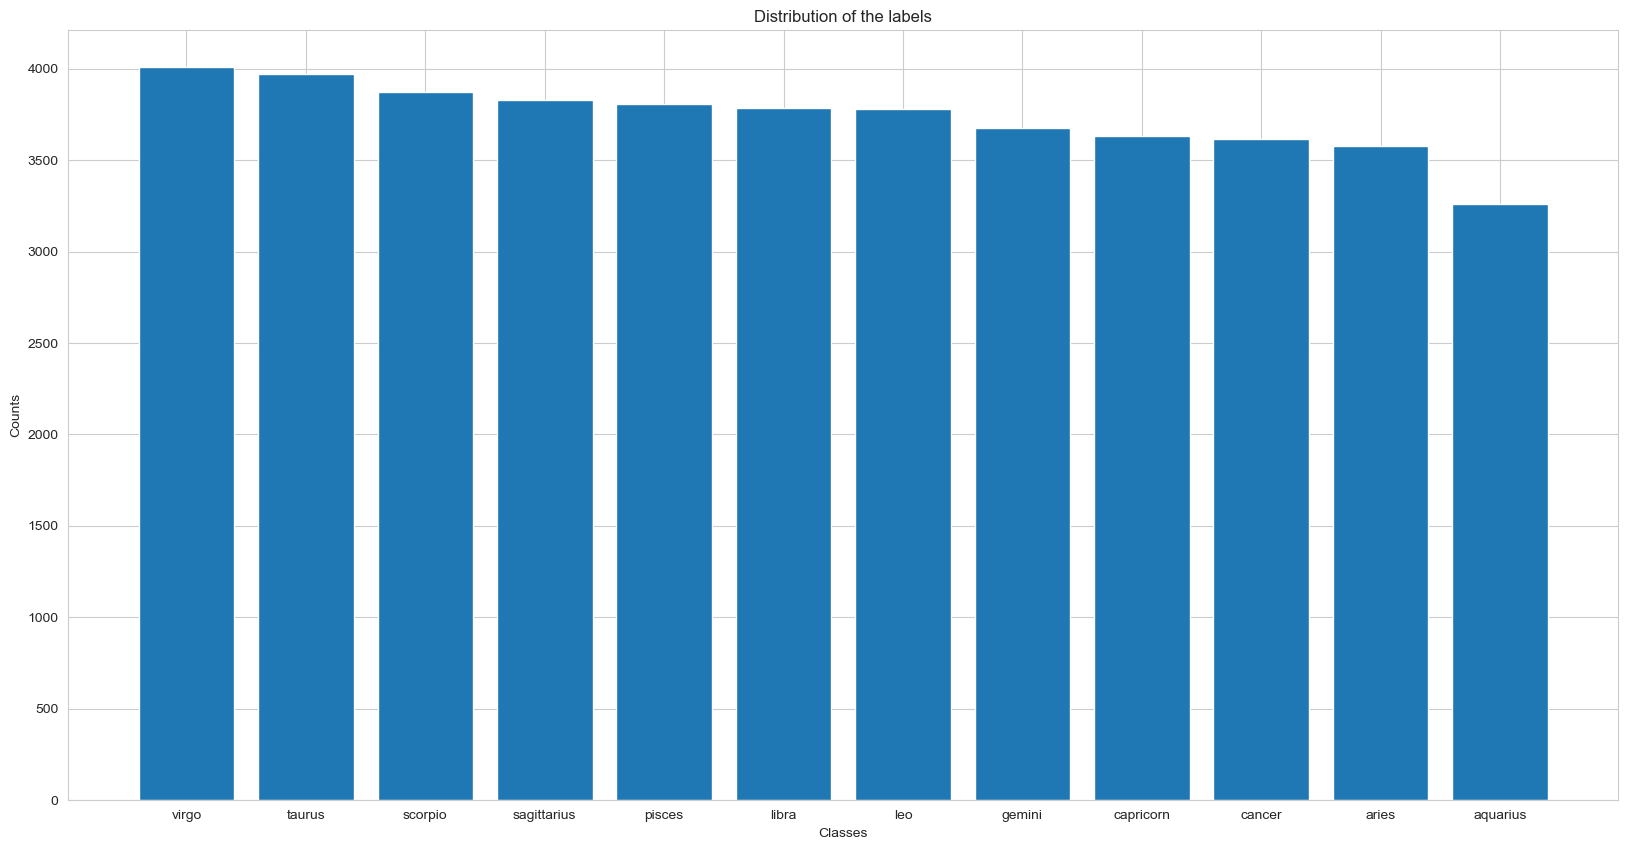

In [9]:
plt.figure(figsize=(20,10))
import matplotlib.pyplot as plt
from collections import Counter

# Sample list of labels
labels = y

# Count occurrences of each label


label_counts = Counter(labels)

# Extract labels and counts for plotting
classes = sorted(label_counts.keys(), reverse=True)
values = sorted(label_counts.values(), reverse=True)


# Create bar plot
plt.bar(classes, values)

# Add title and labels
plt.title('Distribution of the labels')
plt.xlabel('Classes')
plt.ylabel('Counts')

# Show plot
plt.show()
